In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
data = pd.read_csv("results.csv")
data

,forecast_step,persistence,lun_unet,lun_fourcastnet
0,0,0.00,NaN,NaN
1,1,220.11,0.0,0.0
2,2,351.61,0.0,0.0
3,3,449.54,0.0,0.0
4,4,523.24,0.0,0.0
5,5,606.83,0.0,0.0
6,6,655.43,0.0,0.0


In [ ]:
forecast_step = data["forecast_step"].to_numpy(copy=True) * 6

vae_error = 93.9

climatological = 1120.0

climatological_weekly = 820.0

persistence = data["persistence"].to_numpy(copy=True)

ifs = 0

fourcastnet = 0

lun_unet = data["lun_unet"].to_numpy(copy=True)

lun_fourcastnet = data["lun_fourcastnet"].to_numpy(copy=True)

<Axes: title={'center': '500 hPa geopotential RMSE'}, xlabel='Forecast Time (Hours)', ylabel='RMSE'>

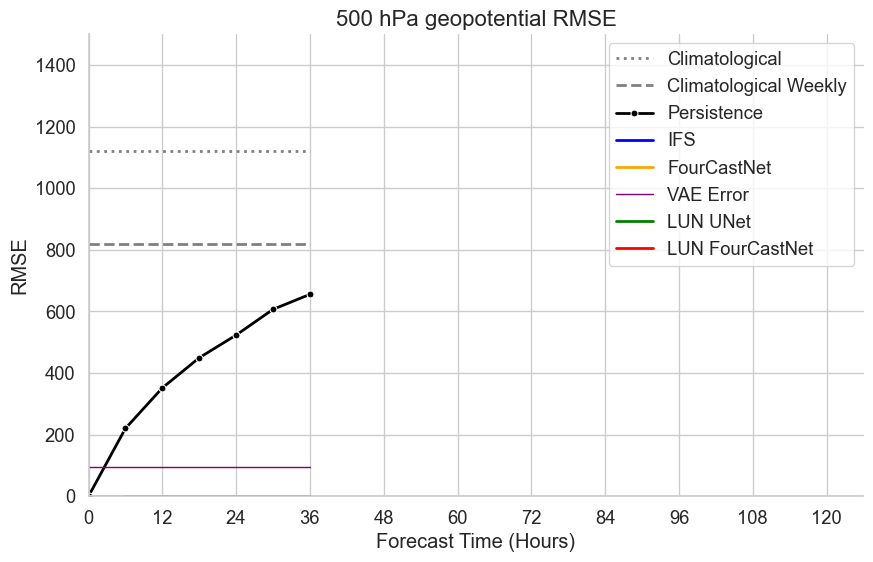

In [ ]:
# lineplot
sns.set_theme(style="whitegrid")
sns.set_context("notebook", font_scale=1.2)
plt.figure(figsize=(10, 6))

# x, y axis limits
plt.ylim(0, 1500)
plt.xlim(0, 126)

# x, y axis ticks
plt.xticks([0, 12, 24, 36, 48, 60, 72, 84, 96, 108, 120])

# x, y axis labels
plt.xlabel("Forecast Time (Hours)")
plt.ylabel("RMSE")
plt.title("500 hPa geopotential RMSE", fontsize=16)

sns.despine()


sns.lineplot(
    x=forecast_step,
    y=climatological,
    label="Climatological",
    color="grey",
    linewidth=2,
    linestyle=":",
)
sns.lineplot(
    x=forecast_step,
    y=climatological_weekly,
    label="Climatological Weekly",
    color="grey",
    linewidth=2,
    linestyle="--",
)
sns.lineplot(
    x=forecast_step,
    y=persistence,
    label="Persistence",
    color="black",
    linewidth=2,
    markers=True,
    marker="o",
    markersize=5,
)
sns.lineplot(x=forecast_step, y=ifs, label="IFS", color="blue", linewidth=2)
sns.lineplot(
    x=forecast_step, y=fourcastnet, label="FourCastNet", color="orange", linewidth=2
)
sns.lineplot(
    x=forecast_step, y=vae_error, label="VAE Error", color="purple", linewidth=1
)
sns.lineplot(x=forecast_step, y=lun_unet, label="LUN UNet", color="green", linewidth=2)
sns.lineplot(
    x=forecast_step,
    y=lun_fourcastnet,
    label="LUN FourCastNet",
    color="red",
    linewidth=2,
)

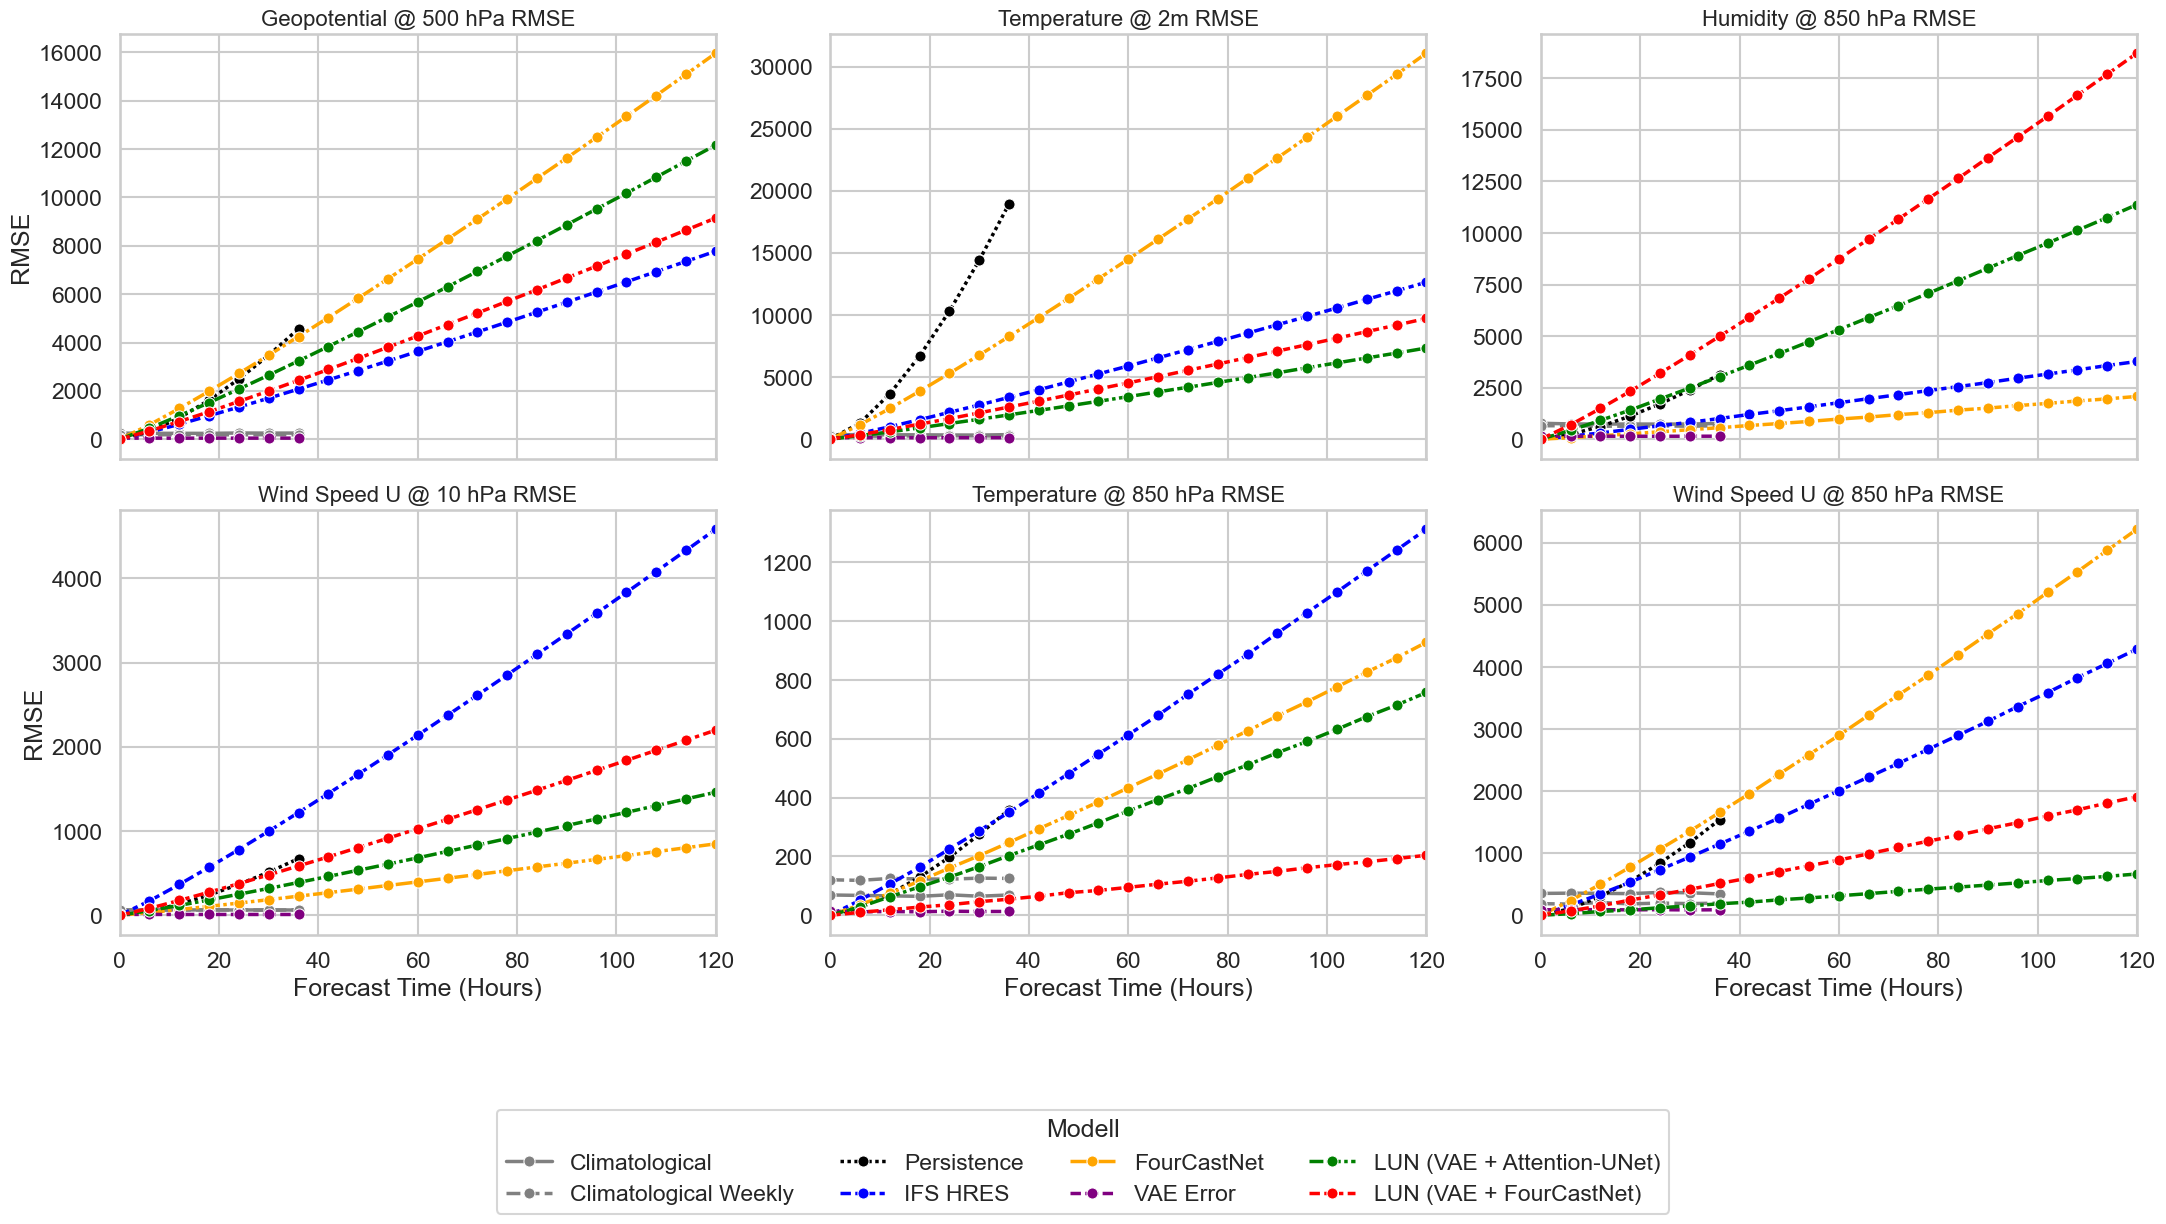

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# -----------------------------------------------------------------------------
# 1. Dummy-Daten generieren (ERSETZE DIESEN TEIL MIT DEINEN ECHTEN DATEN)
# -----------------------------------------------------------------------------
# Annahmen für die Dummy-Daten:
variables = [
    "Geopotential @ 500 hPa",
    "Temperature @ 2m",
    "Humidity @ 850 hPa",
    "Wind Speed U @ 10 hPa",
    "Temperature @ 850 hPa",
    "Wind Speed U @ 850 hPa",
]
models = [
    "Climatological",
    "Climatological Weekly",
    "Persistence",
    "IFS HRES",
    "FourCastNet",
    "VAE Error",
    "LUN (VAE + Attention-UNet)",
    "LUN (VAE + FourCastNet)",
]
forecast_times = np.arange(
    0, 121, 6
)  # Vorhersagezeiten in Stunden (z.B. 0 bis 120h, alle 6h)

# Erstelle einen leeren DataFrame
data = []

# Generiere fiktive RMSE-Werte für jede Kombination
np.random.seed(42)  # Für reproduzierbare Ergebnisse
for var in variables:
    # Unterschiedliche Basis-RMSE-Level und Anstiege für jede Variable
    base_rmse = np.random.uniform(1, 500)
    time_factor = np.random.uniform(0.01, 0.5)
    for model in models:
        # Unterschiedliche Performance für jedes Modell
        model_factor = np.random.uniform(0.5, 2.0)
        # Simuliere RMSE-Verlauf (oft ansteigend, kann aber variieren)
        # Beispiel: Startet bei ~0 für Vorhersagezeit 0 (außer Klimatologie/Persistenz)
        # und steigt dann an, mit etwas Rauschen.
        if model in ["Climatological", "Climatological Weekly"]:
            rmse_values = np.full_like(
                forecast_times,
                base_rmse * model_factor * 0.8
                + np.random.rand(len(forecast_times)) * base_rmse * 0.1,
                dtype=float,
            )
            # Evtl. nur ein Wert für Klimatologie (wie im Beispiel)
            if "Weekly" not in model:
                rmse_values[forecast_times > 36] = np.nan  # Nur bis 36h im Beispiel
            else:
                rmse_values[forecast_times > 36] = np.nan  # Nur bis 36h im Beispiel
        elif model == "Persistence":
            # Steigt oft linear oder quadratisch an, startet bei 0
            rmse_values = (
                base_rmse * model_factor * (forecast_times * time_factor * 0.5) ** 1.5
                + np.random.rand(len(forecast_times)) * base_rmse * 0.05
            )
            rmse_values[0] = 0  # RMSE zur Zeit 0 ist 0
            rmse_values[forecast_times > 36] = np.nan  # Nur bis 36h im Beispiel
        elif model == "VAE Error":
            rmse_values = np.full_like(
                forecast_times,
                base_rmse * model_factor * 0.15
                + np.random.rand(len(forecast_times)) * base_rmse * 0.02,
                dtype=float,
            )
            rmse_values[forecast_times > 36] = np.nan  # Nur bis 36h im Beispiel
        else:  # KI Modelle
            # Starten bei 0, steigen langsamer an als Persistenz
            perf_factor = np.random.uniform(
                0.1, 0.8
            )  # Bessere Modelle haben kleineren Faktor
            rmse_values = (
                base_rmse
                * model_factor
                * perf_factor
                * (forecast_times * time_factor) ** 1.1
                + np.random.rand(len(forecast_times)) * base_rmse * 0.03
            )
            rmse_values[0] = 0  # RMSE zur Zeit 0 ist 0

        for t, rmse in zip(forecast_times, rmse_values):
            if not np.isnan(rmse):  # Füge nur gültige Werte hinzu
                data.append(
                    {
                        "Forecast Time (Hours)": t,
                        "RMSE": rmse,
                        "Variable": var,
                        "Model": model,
                    }
                )

# Erstelle den Pandas DataFrame
df = pd.DataFrame(data)

# WICHTIG: Hier müsstest du stattdessen deine Daten laden, z.B. aus CSV-Dateien
# Beispiel:
# df = pd.read_csv('deine_ergebnis_daten.csv')
# Stelle sicher, dass der DataFrame Spalten wie 'Forecast Time (Hours)', 'RMSE', 'Variable', 'Model' hat.

# -----------------------------------------------------------------------------
# 2. Plot erstellen
# -----------------------------------------------------------------------------

# Setze den Seaborn-Stil (ähnlich zum Beispiel)
sns.set_theme(
    style="whitegrid", context="talk", palette="muted"
)  # 'talk' für größere Schrift, 'whitegrid' für Gitter

# Definiere Farben und Linienstile für Konsistenz (inspiriert vom Beispiel)
palette = {
    "Climatological": "grey",
    "Climatological Weekly": "grey",
    "Persistence": "black",
    "IFS HRES": "blue",
    "FourCastNet": "orange",
    "VAE Error": "purple",
    "LUN (VAE + Attention-UNet)": "green",
    "LUN (VAE + FourCastNet)": "red",
}

# Linienstile und Marker
styles = {
    "Climatological": "-",
    "Climatological Weekly": "-",
    "Persistence": "-",
    "IFS HRES": "-",
    "FourCastNet": "-",
    "VAE Error": "-",
    "LUN (VAE + Attention-UNet)": "-",
    "LUN (VAE + FourCastNet)": "-",
}

markers = {
    "Climatological": "o",
    "Climatological Weekly": "o",
    "Persistence": "o",
    "IFS HRES": "o",
    "FourCastNet": "o",
    "VAE Error": "o",
    "LUN (VAE + Attention-UNet)": "o",
    "LUN (VAE + FourCastNet)": "o",
}

# Erstelle das 3x2 Subplot-Raster
# figsize anpassen je nach Bedarf für deine Masterarbeit (Breite, Höhe in Inches)
fig, axes = plt.subplots(2, 3, figsize=(22, 11), sharex=True)  # Gemeinsame X-Achse

# Flatten das Array der Achsen für einfache Iteration
axes_flat = axes.flatten()

# Iteriere durch jede Variable und die entsprechende Achse
for i, var in enumerate(variables):
    ax = axes_flat[i]
    data_subset = df[df["Variable"] == var]

    # Erstelle den Linienplot für die aktuelle Variable
    sns.lineplot(
        data=data_subset,
        x="Forecast Time (Hours)",
        y="RMSE",
        hue="Model",  # Färbt Linien nach Modell
        style="Model",  # Setzt Linienstile nach Modell
        markers=markers,  # Setzt Marker nach Modell (kann auch True sein für alle)
        # dashes=styles,        # Verwendet die definierten Linienstile
        palette=palette,  # Verwendet die definierte Farbpalette
        lw=2.5,  # Liniendicke
        ms=8,  # Markergröße (falls Marker verwendet werden)
        ax=ax,  # Zeichne auf der aktuellen Achse
    )

    # Setze den Titel für jedes Subplot
    ax.set_title(f"{var} RMSE", fontsize=16)

    # Achsenbeschriftungen anpassen (nur außen)
    if i % 3 == 0:  # Linke Spalte
        ax.set_ylabel("RMSE")
    else:
        ax.set_ylabel("")  # Keine Y-Beschriftung für rechte Spalte

    if i < 3:  # Obere zwei Reihen
        ax.set_xlabel("")  # Keine X-Beschriftung
    else:  # Unterste Reihe
        ax.set_xlabel("Forecast Time (Hours)")

    # Setze Achsenlimits (optional, aber oft gut für Vergleichbarkeit)
    # Du könntest die Limits pro Variable anpassen oder global setzen
    ax.set_xlim(0, forecast_times.max())
    # ax.set_ylim(0, data_subset['RMSE'].max() * 1.1) # Automatisches Y-Limit mit Puffer

    # Legende nur einmal anzeigen (oder eine gemeinsame Legende erstellen)
    ax.get_legend().remove()  # Entferne individuelle Legenden


# -----------------------------------------------------------------------------
# 3. Globale Anpassungen und Legende
# -----------------------------------------------------------------------------

# Hole Handles und Labels von einem der Plots für die gemeinsame Legende
handles, labels = axes_flat[0].get_legend_handles_labels()

# Erstelle eine gemeinsame Legende unterhalb der Plots
# Passt die Position und Anzahl der Spalten nach Bedarf an
fig.legend(
    handles,
    labels,
    loc="lower center",
    bbox_to_anchor=(0.5, -0.15),
    ncol=4,
    title="Modell",
)

# Füge einen optionalen Haupttitel hinzu
# fig.suptitle('Vergleich der Wettermodelle - RMSE für verschiedene Variablen', fontsize=20, y=1.03)

# Optimiere das Layout, um Überlappungen zu vermeiden
plt.tight_layout(
    rect=[0, 0.03, 1, 0.98]
)  # rect passt den Bereich an, um Platz für die Legende unten zu lassen

# -----------------------------------------------------------------------------
# 4. Plot anzeigen oder speichern
# -----------------------------------------------------------------------------

# Speichern des Plots (empfohlen für Masterarbeit)
# dpi=300 für gute Druckqualität
plt.savefig("wettermodell_vergleich_3x2.png", dpi=300, bbox_inches="tight")
# plt.savefig('wettermodell_vergleich_3x2.pdf', bbox_inches='tight') # Alternativ als PDF

# Zeige den Plot an
plt.show()

In [2]:
df

,Forecast Time (Hours),RMSE,Variable,Model
0,0,251.452791,Geopotential @ 500 hPa,Climatological
1,6,243.135786,Geopotential @ 500 hPa,Climatological
2,12,243.135333,Geopotential @ 500 hPa,Climatological
3,18,241.295631,Geopotential @ 500 hPa,Climatological
4,24,256.479328,Geopotential @ 500 hPa,Climatological
...,...,...,...,...
667,96,1491.112878,Wind Speed U @ 850 hPa,LUN (VAE + FourCastNet)
668,102,1601.146643,Wind Speed U @ 850 hPa,LUN (VAE + FourCastNet)
669,108,1697.745185,Wind Speed U @ 850 hPa,LUN (VAE + FourCastNet)
670,114,1807.958689,Wind Speed U @ 850 hPa,LUN (VAE + FourCastNet)


In [7]:
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, MultipleLocator
import pandas as pd
import numpy as np

df_persistence = pd.read_csv("evaluation/persistence.csv")
df_persistence["z500"]

0       0.000000
1     226.080962
2     332.173737
3     458.337606
4     527.102014
5     611.139997
6     657.629485
7     709.457644
8     738.957970
9     779.864183
10    799.914533
11    833.378974
12    839.793002
13    863.818750
14    870.704879
15    893.033959
16    906.703170
17    924.673570
18    934.202282
19    948.592026
20    956.522702
Name: z500, dtype: float64

Duplicate key in file 'stylesheet.mplstyle', line 84 ('mathtext.fontset: stix')


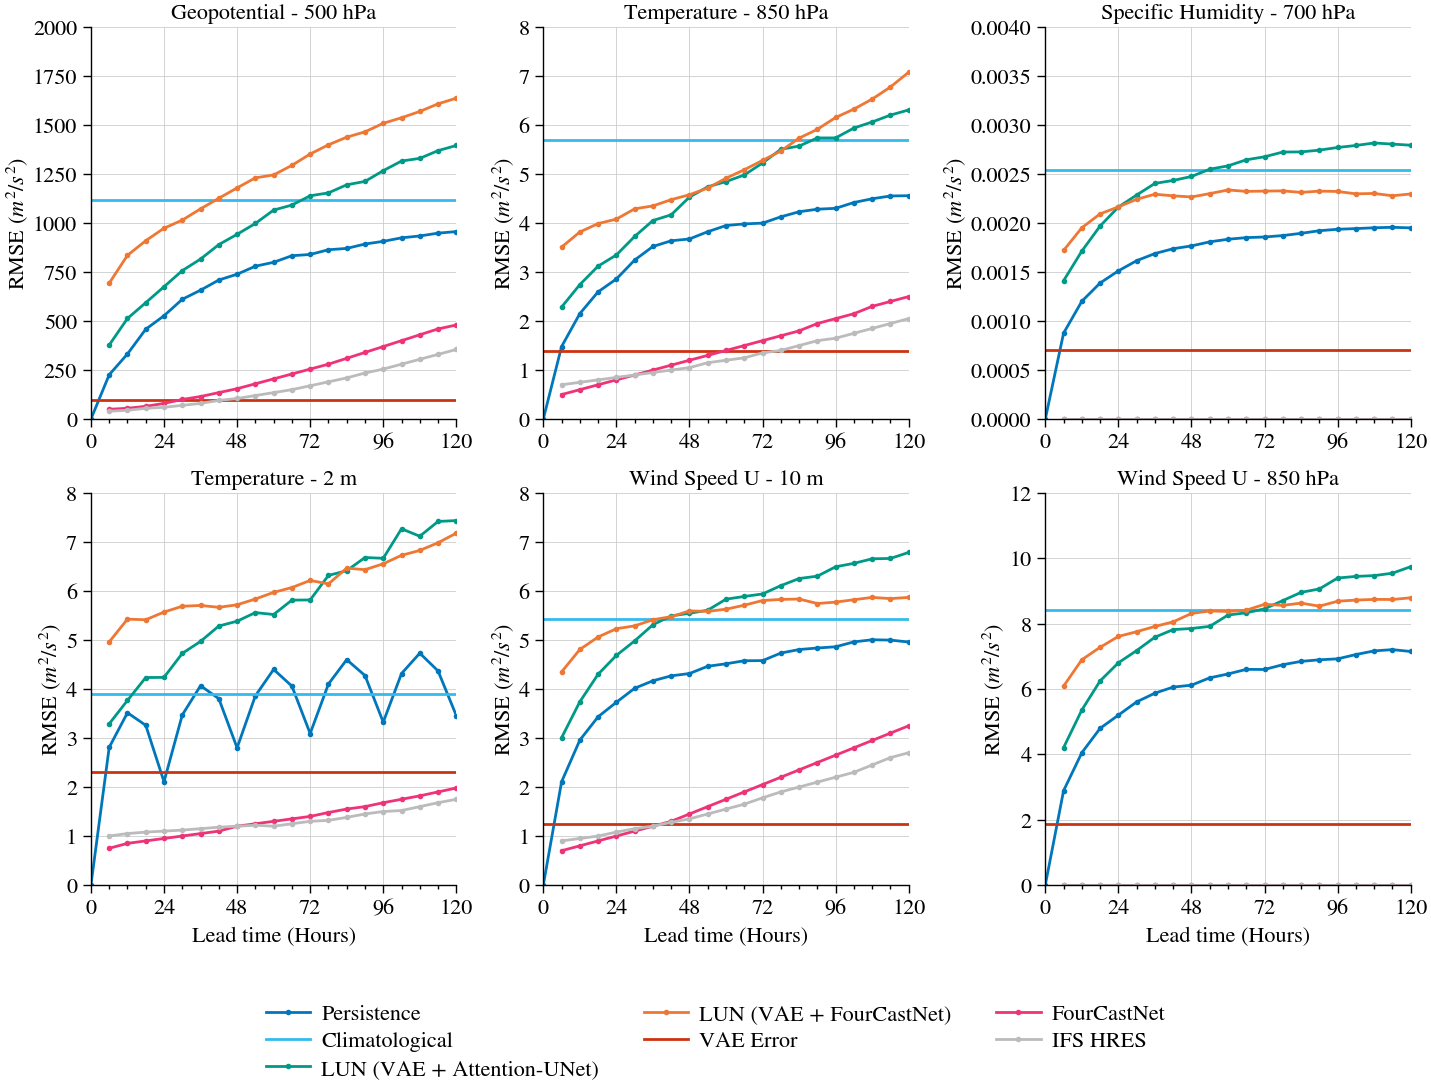

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, MultipleLocator
import pandas as pd
import numpy as np

vars = ["z500", "t850", "h700", "t2m", "u10", "u850"]

title = {
    "z500": "Geopotential - 500 hPa",
    "t850": "Temperature - 850 hPa",
    "h700": "Specific Humidity - 700 hPa",
    "t2m": "Temperature - 2 m",
    "u10": "Wind Speed U - 10 m",
    "u850": "Wind Speed U - 850 hPa",
}

ylim = {
    "z500": (0, 2000),
    "t850": (0, 8),
    "h700": (0, 0.004),
    "t2m": (0, 8),
    "u10": (0, 8),
    "u850": (0, 12),
}

y_label = {
    "z500": "wRMSE ($m^2$/$s^2$)",
    "t850": "wRMSE ($K$)",
    "h700": "wRMSE ($g/kg$)",
    "t2m": "wRMSE ($K$)",
    "u10": "wRMSE ($m/s$)",
    "u850": "wRMSE ($m/s$)",
}

df_persistence = pd.read_csv("evaluation/persistence.csv")
df_climatology = pd.read_csv("evaluation/climatology.csv")
df_vae_error = pd.read_csv("evaluation/vae_error.csv")
df_lun_unet = pd.read_csv("evaluation/lun_unet.csv")
df_lun_fourcastnet = pd.read_csv("evaluation/lun_fourcastnet.csv")
df_fourcastnet = pd.read_csv("evaluation/fourcastnet.csv")
df_ifs = pd.read_csv("evaluation/ifs.csv")

x = np.array(df_persistence.index) * 6

plt.style.use("stylesheet.mplstyle")

fig, axes = plt.subplots(2, 3, dpi=200, constrained_layout=True)


axes_flat = axes.flatten()

for i, ax in enumerate(axes_flat):
    var = vars[i]

    ax.set_xlim(0, 120)
    ax.set_ylim(ylim[var])

    # x, y axis ticks
    ax.xaxis.set_major_locator(MultipleLocator(24))
    ax.xaxis.set_minor_locator(AutoMinorLocator(4))
    # ax.yaxis.set_major_locator(MultipleLocator(300))
    # ax.yaxis.set_minor_locator(AutoMinorLocator(3))

    # x, y axis labels
    if i >= 3:
        ax.set_xlabel("Lead time (Hours)")
    ax.set_ylabel("wRMSE ($m^2$/$s^2$)", labelpad=1)
    ax.set_title(title[var], fontsize=8)

    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

    ax.plot(x, df_persistence[var], label="Persistence", marker="o")
    ax.plot(x, df_climatology[var].repeat(len(x)), label="Climatological")
    ax.plot(
        x[1:], df_lun_unet[var][:-1], label="LUN (VAE + Attention-UNet)", marker="o"
    )
    ax.plot(
        x[1:],
        df_lun_fourcastnet[var][:-1],
        label="LUN (VAE + FourCastNet)",
        marker="o",
    )
    ax.plot(x, df_vae_error[var].repeat(len(x)), label="VAE Error")
    ax.plot(x[1:], df_fourcastnet[var][:-1], label="FourCastNet", marker="o")
    ax.plot(x[1:], df_ifs[var][:-1], label="IFS HRES", marker="o")


handles, labels = axes_flat[0].get_legend_handles_labels()

fig.legend(
    handles,
    labels,
    loc="lower center",
    bbox_to_anchor=(0.5, -0.15),
    ncol=3,
)

plt.show()

fig.savefig("test.pdf", bbox_inches="tight")

Duplicate key in file 'stylesheet.mplstyle', line 84 ('mathtext.fontset: stix')


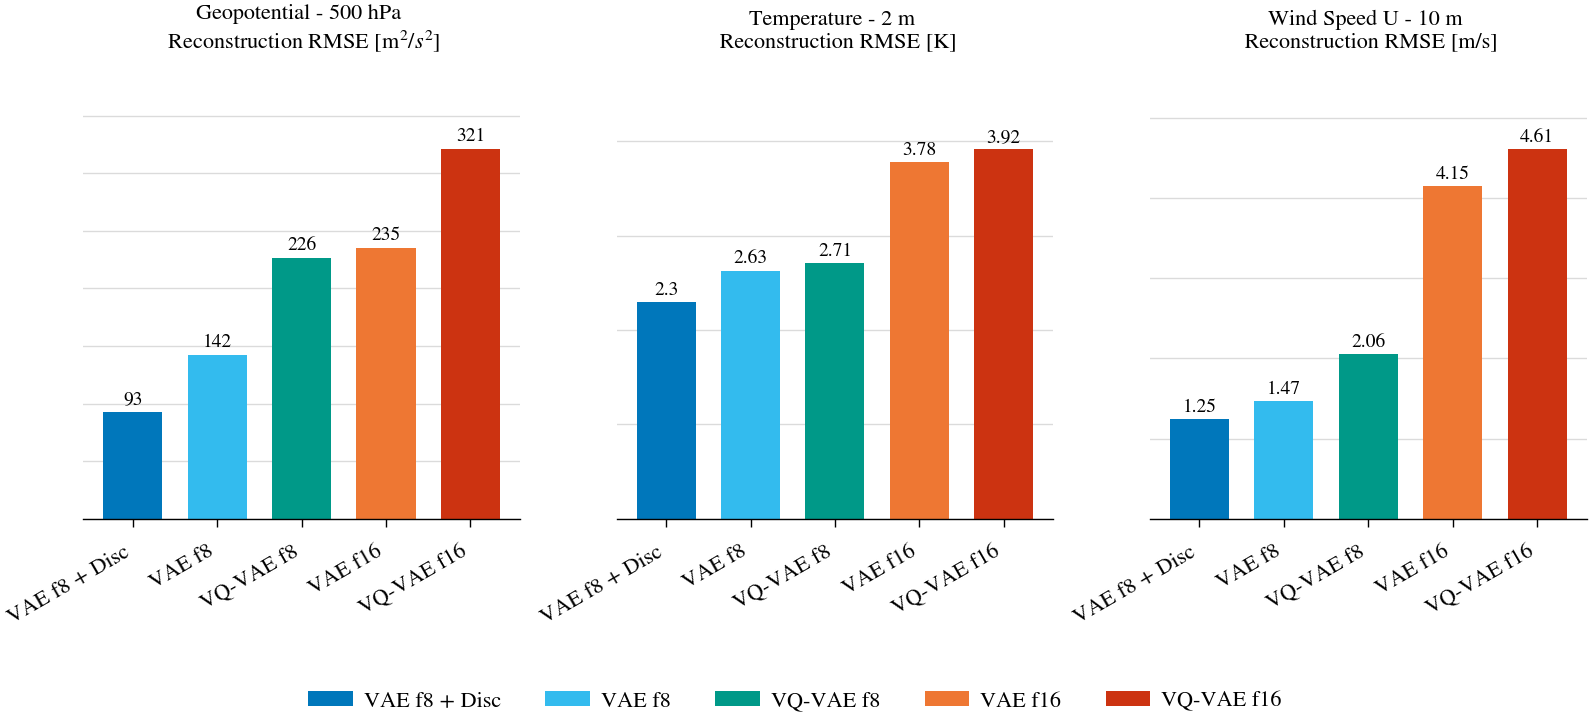

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, MultipleLocator
import pandas as pd
import numpy as np

# Verwende dein Stylesheet
plt.style.use("stylesheet.mplstyle")  # Stelle sicher, dass dieses existiert

# Beispieldaten (angenommen, jeder Subplot könnte unterschiedliche Daten haben)
categories = ["VAE f8 + Disc", "VAE f8", "VQ-VAE f8", "VAE f16", "VQ-VAE f16"]
values_subplot1 = [93, 142, 226, 235, 321]
values_subplot2 = [230, 263, 271, 378, 392]  # Beispiel: Gleiche Daten
values_subplot3 = [125, 147, 206, 415, 461]  # Beispiel: Gleiche Daten
all_values = [values_subplot1, values_subplot2, values_subplot3]

# Subplot-Titel (Beispiele)
subplot_titles = [
    "Geopotential - 500 hPa \n Reconstruction wRMSE [m$^2$/$s^2$]",
    "Temperature - 2 m \n Reconstruction wRMSE [K]",
    "Wind Speed U - 10 m \n Reconstruction wRMSE [m/s]",
]

# Farben für die Balken (aus deinem Stylesheet oder eine Auswahl davon)
# Die ersten vier Farben aus deinem 'axes.prop_cycle'
# Wichtig: Hex-Codes als Strings mit '#' am Anfang
bar_colors = ["#0077BB", "#33BBEE", "#009988", "#EE7733", "#CC3311"]
# Stelle sicher, dass du genügend Farben für die Anzahl der Kategorien hast.
# Wenn du mehr Kategorien hättest, würdest du die Liste erweitern:
# bar_colors = ['#0077BB', '#33BBEE', '#009988', '#EE7733', '#CC3311', '#EE3377', '#BBBBBB']


# --- Erstelle die Figur und Achsen ---
fig, axes = plt.subplots(
    1, 3, dpi=200, constrained_layout=True, figsize=(8, 3.2)
)  # Höhe leicht angepasst
axes_flat = axes.flatten()


for i, ax in enumerate(axes_flat):
    current_values = all_values[i]
    # Hier werden die Farben für die Balken übergeben
    bars = ax.bar(
        categories, current_values, width=0.7, color=bar_colors, label=categories
    )

    # --- Subplot-Titel ---
    ax.set_title(
        subplot_titles[i], fontsize=plt.rcParams.get("axes.titlesize", 10), pad=10
    )  # Etwas mehr Abstand für den Titel

    # --- Raster entfernen ---
    ax.grid(True)

    # Grid to background
    ax.set_axisbelow(True)

    # Grid only for y-axis
    ax.yaxis.grid(True, linewidth=0.5, alpha=0.7)
    ax.xaxis.grid(False)  # Deaktiviere Gitterlinien für die X-Achse

    # --- Ticks anpassen ---
    ax.tick_params(axis="y", which="both", length=0)
    ax.tick_params(
        axis="x",
        which="major",
        length=3,
        width=plt.rcParams.get("xtick.major.width", 0.5),
        pad=5,
    )  # Mehr Abstand für X-Tick-Labels

    # --- Spines anpassen ---
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.spines["bottom"].set_visible(True)
    ax.spines["bottom"].set_linewidth(plt.rcParams.get("axes.linewidth", 0.5))

    # --- Y-Achsen-Tick-Beschriftungen entfernen ---
    ax.yaxis.set_tick_params(labelleft=False, labelright=False)

    # --- X-Achsen-Tick-Beschriftungen ---
    ax.tick_params(axis="x", labelsize=plt.rcParams.get("xtick.labelsize", 8))
    # Optional: Rotation für längere Labels
    plt.setp(ax.get_xticklabels(), rotation=30, ha="right")

    # --- Werte auf den Balken anzeigen ---
    value_offset = 4  # Kleiner Offset, damit die Zahl nicht direkt auf dem Balken klebt
    for bar_patch in bars:
        height = bar_patch.get_height()
        if i == 0:
            ax.annotate(
                f"{int(height)}",
                (bar_patch.get_x() + bar_patch.get_width() / 2, height + value_offset),
                ha="center",
                va="bottom",
                fontsize=plt.rcParams.get("font.size", 8)
                - 1,  # Ggf. Schriftgröße anpassen
            )
        else:
            ax.annotate(
                f"{int(height) / 100}",
                (bar_patch.get_x() + bar_patch.get_width() / 2, height + value_offset),
                ha="center",
                va="bottom",
                fontsize=plt.rcParams.get("font.size", 8)
                - 1,  # Ggf. Schriftgröße anpassen
            )

    # --- Y-Achsen-Limits anpassen, um Platz für die Zahlen über den Balken zu schaffen ---
    current_max_y = max(current_values) if current_values else 0
    ax.set_ylim(
        0, current_max_y * 1.20
    )  # 20% mehr Platz oben für bessere Lesbarkeit der Zahlen

# --- Gesamttitel (optional) ---
# fig.suptitle(
#     "Vergleich verschiedener Modellkonfigurationen",
#     fontsize=plt.rcParams.get("figure.titlesize", 12),
#     y=1.1,
# )  # y anpassen für Position

handles, labels = axes_flat[0].get_legend_handles_labels()

fig.legend(
    handles,
    labels,
    loc="lower center",
    bbox_to_anchor=(0.5, -0.15),
    ncol=5,
)

# --- Layout anpassen ---
# `constrained_layout=True` kümmert sich meist gut um das Layout.
# Falls nötig, Feinanpassung mit fig.subplots_adjust()
# z.B. fig.subplots_adjust(left=0.08, right=0.98, top=0.85, bottom=0.15) wenn kein constrained_layout

# --- Speichern oder Anzeigen ---
plt.show()